In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns 
from scipy import stats 

In [3]:
file_path = r'C:\Users\Asus\Desktop\TSU\Анализ данных\ДЗ_статистика\data\task1\physics-vs-lyrics.csv'
df = pd.read_csv(file_path, sep = '\t')

In [4]:
df.head()

,id,Тип мышления,Пол,Балл
0,225070,лирик,ж,39
1,166928,лирик,ж,39
2,724664,лирик,ж,48
3,381522,лирик,ж,58
4,568374,физик,м,70


In [5]:
df.dtypes

id               int64
Тип мышления    object
Пол             object
Балл             int64
dtype: object

In [6]:
df = df.rename(columns = {'Тип мышления': 'mindset', 'Пол': 'sex', 'Балл': 'points'})

In [7]:
#Предварительно построим необходимые датафреймы, которые понадобятся в дальнейшем для ответа на вопросы задачи
df_boys = df[df['sex'] == 'м']
df_girls = df[df['sex'] == 'ж']
df_physics = df[df['mindset'] == 'физик']
df_lyrics = df[df['mindset'] == 'лирик']

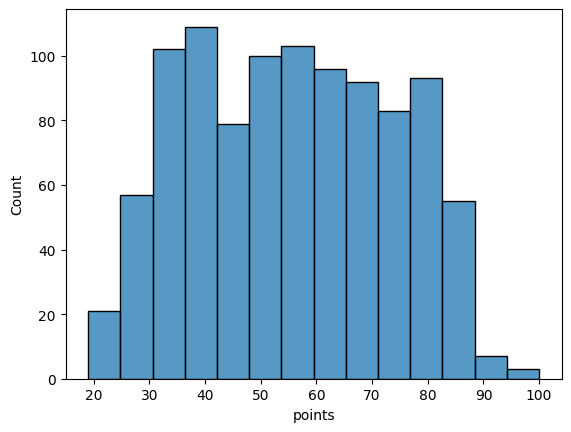

In [8]:
distribution = sns.histplot(df['points'])

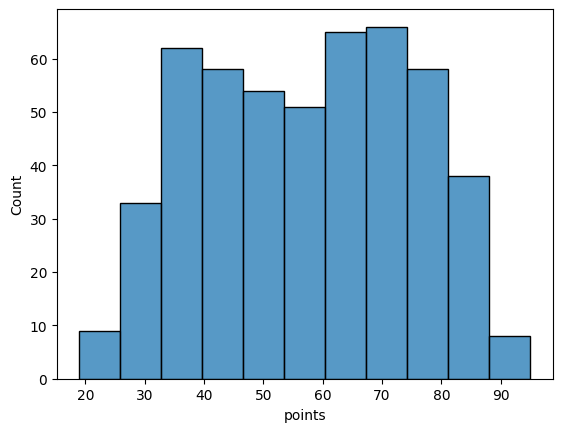

In [9]:
distribution_boys = sns.histplot(df_boys['points'])

In [10]:
#1 Построить 95%-доверительные интервалы для среднего балла:
#a  по данным всей выборки; 
#b  отдельно для каждой из групп «физиков» и «лириков»; 
#c  отдельно для юношей и девушек.

In [11]:
#a 
mean_point = float(df.points.mean())
n = df.shape[0]
std = np.std(df.points, ddof = 1) 
coefficient = std/n**0.5
alpha = 0.05
t_critical = stats.t.ppf(1-alpha/2, df=n-1)
lower_mean = mean_point - t_critical * coefficient
upper_mean = mean_point + t_critical * coefficient
lower_mean, upper_mean

(np.float64(54.453811944870196), np.float64(56.6701880551298))

In [12]:
#Реализуем функцию для решения первого пункта 
def confidence_interval(data, alpha=0.05):
    mean_point = data['points'].mean()
    n = data.shape[0]
    std = np.std(data['points'], ddof = 1)
    coefficient = std/n**0.5
    
    t_critical = stats.t.ppf(1-alpha/2, df=n-1)
    lower = mean_point - t_critical * coefficient
    upper = mean_point + t_critical * coefficient
    
    
    return f'Полученный доверительный интервал: [{lower}; {upper}]'

In [13]:
#a
confidence_interval(df, 0.05)

'Полученный доверительный интервал: [54.453811944870196; 56.6701880551298]'

In [14]:
#b
confidence_interval(df_physics)


#confidence_interval(df_lyrics)

'Полученный доверительный интервал: [54.83482694868374; 57.94226916583568]'

In [15]:
#c
confidence_interval(df_boys)

#confidence_interval(df_girls)

'Полученный доверительный интервал: [55.79216865255584; 58.91699469405771]'

In [16]:
#2 Проверить на 5% уровне значимости гипотезу о том, что средний балл = 55, против двусторонней и двух односторонних альтернатив:
#a по данным всей выборки; 
#b отдельно для каждой из групп «физиков» и «лириков»; 
#c отдельно для юношей и девушек

In [17]:
def t_test(df, A0, alpha=0.05, alternative='<>'):
    """t-тест для проверки гипотезы E(X) = A0.

    Args:
        X (iterable): выборка.

        A0 (double): тестируемое значение гипотезы H0.

        alpha (float, optional): уровень значимости, defaults to 5%.

        alternative (str, optional): вид альтернативной гипотезы,
        возможные значения '<', '>', '<>', defaults to '<>'.
    """
        
    n = df.shape[0]
    a = np.mean(df['points'])
    coefficient = np.std(df['points'], ddof=1) / n**0.5
    
    t = (a - A0) / coefficient

    if alternative == '<>':
        t_critical = stats.t.ppf(1-alpha/2, df=n-1)
        p_value = 2*min(stats.t.cdf(t, df=n-1), stats.t.cdf(1-t, df=n-1), 1/2)
    elif alternative == '>':
        t_critical = stats.t.ppf(1-alpha, df=n-1)
        p_value = 1 - stats.t.cdf(t, df=n-1)
    elif alternative == '<':
        t_critical = stats.t.ppf(alpha, df=n-1)
        p_value = stats.t.cdf(t, df=n-1)
    else:
        print (f'Указан некорректный вид альтернативной гипотезы!')
        return None

    return {
        't': t, 
        't_critical': t_critical, 
        'p_value': p_value, 
        'h0_rejected': p_value < alpha
    }


In [18]:
#a "<>"
#t_test(df, 55, 0.05, alternative='<>')
#a ">"
#t_test(df, 55, 0.05, alternative='>')
#a "<"
t_test(df, 55, 0.05, alternative='<')


{'t': np.float64(0.9951703558362369),
 't_critical': np.float64(-1.6463803454275356),
 'p_value': np.float64(0.8400528014457656),
 'h0_rejected': np.False_}

In [19]:

#b "<>" "physics"
t_test(df_physics, 55, 0.05, alternative='<>')
#b ">" "physics"
t_test(df_physics, 55, 0.05, alternative='>')
#b "<" "physics"
t_test(df_physics, 55, 0.05, alternative='<')




{'t': np.float64(1.7559590852891516),
 't_critical': np.float64(-1.6479820768102469),
 'p_value': np.float64(0.9601386553399743),
 'h0_rejected': np.False_}

In [20]:

#b "<>" "lyrics"
t_test(df_lyrics, 55, 0.05, alternative='<>')
#b ">" "lyrics"
t_test(df_lyrics, 55, 0.05, alternative='>')
#b "<" "lyrics"
t_test(df_lyrics, 55, 0.05, alternative='<')




{'t': np.float64(-0.2845569664319203),
 't_critical': np.float64(-1.6478468772297017),
 'p_value': np.float64(0.3880495442955611),
 'h0_rejected': np.False_}

In [21]:
#c "<>" "boys"
t_test(df_boys, 55, 0.05, alternative='<>')
#c ">" "boys"
t_test(df_boys, 55, 0.05, alternative='>')
#c "<" "boys"
t_test(df_boys, 55, 0.05, alternative='<')


{'t': np.float64(2.960850208306361),
 't_critical': np.float64(-1.6479007483164256),
 'p_value': np.float64(0.9983933004654525),
 'h0_rejected': np.False_}

In [22]:
#c "<>" "girls"
t_test(df_girls, 55, 0.05, alternative='<>')
#c ">" "girls"
t_test(df_girls, 55, 0.05, alternative='>')
#c "<" "girls"
t_test(df_girls, 55, 0.05, alternative='<')


{'t': np.float64(-1.5666228373687106),
 't_critical': np.float64(-1.6479253184645497),
 'p_value': np.float64(0.05891966353265356),
 'h0_rejected': np.False_}

In [23]:
#3 Проверить на 5% уровне значимости гипотезу о равенстве средних баллов:
#a отдельно для каждой из групп «физиков» и «лириков»; 
#b отдельно для юношей и девушек; 
#c отдельно для групп «физики-юноши и девушки-лирики» против остальных. 

In [37]:
#Создадим новые датафреймы для решения данной задачи 
df_physics_boys = df_physics[df_physics['sex'] == 'м']
df_lyrics_girls = df_lyrics[df_lyrics['sex'] == 'ж']
condition = ((df['sex'] == 'м') & (df['mindset'] == 'лирик')) | (df['sex'] == 'ж') 
condition_1 = ((df['sex'] == 'ж') & (df['mindset'] == 'физик')) | (df['sex'] == 'м')
df_except_physics_boys = df[condition]
df_except_lyrics_girls = df[condition_1]

In [25]:
def t_test2(df, df_1, alpha=0.05, alternative='<>'):
    """t-тест Уэлча для проверки гипотезы E(X) = E(Y).

    Args:
        X (iterable): выборка X.
        
        Y (iterable): выборка Y.

        alpha (float, optional): уровень значимости, defaults to 5%.

        alternative (str, optional): вид альтернативной гипотезы,
        возможные значения '<', '>', '<>', defaults to '<>'.

        см. двухвыборочный t-критерий для независимых выборок
            (https://ru.wikipedia.org/wiki/T-критерий_Стьюдента)
    """
    n = len(df)
    a = np.mean(df['points'])
    v = np.var(df['points'], ddof=1) / n


    n_1 = len(df_1)
    a_1 = np.mean(df_1['points'])
    v_1 = np.var(df_1['points'], ddof=1) / n_1


    se = (v + v_1)**0.5
    t = (a - a_1) / se
    df = int((v + v_1)**2 / (v**2/(n-1) + v_1**2/(n_1-1)) + 1/2)

    if alternative == '<>':
        t_critical = stats.t.ppf(1-alpha/2, df=df)
        p_value = 2*min(stats.t.cdf(t, df=df), stats.t.cdf(1-t, df=df), 1/2)
    elif alternative == '>':
        t_critical = stats.t.ppf(1-alpha, df=df)
        p_value = 1 - stats.t.cdf(t, df=df)
    elif alternative == '<':
        t_critical = stats.t.ppf(alpha, df=df)
        p_value = stats.t.cdf(t, df=df)
    else:
        print (f'Указан некорректный вид альтернативной гипотезы!')
        return None
    
    return {
        't': t, 
        't_critical': t_critical, 
        'p_value': p_value, 
        'h0_rejected': p_value < alpha
    }

In [26]:
#a physics <> lyrics 
t_test2(df_physics, df_lyrics)

{'t': np.float64(1.4337659941895144),
 't_critical': np.float64(1.9623438462163336),
 'p_value': np.float64(0.6645521248586106),
 'h0_rejected': np.False_}

In [27]:
#b boys <> girls 
t_test2(df_boys, df_girls)

{'t': np.float64(3.2017465606859),
 't_critical': np.float64(1.9623438462163336),
 'p_value': np.float64(0.027911408949461786),
 'h0_rejected': np.True_}

In [28]:
#b boys > girls 
t_test2(df_boys, df_girls, 0.05, '>')

{'t': np.float64(3.2017465606859),
 't_critical': np.float64(1.6463818766348755),
 'p_value': np.float64(0.0007045734501036627),
 'h0_rejected': np.True_}

In [29]:
#b boys < girls 
t_test2(df_boys, df_girls, 0.05, '<')

{'t': np.float64(3.2017465606859),
 't_critical': np.float64(-1.6463818766348761),
 'p_value': np.float64(0.9992954265498963),
 'h0_rejected': np.False_}

In [30]:
#c physics_boys <> others  
t_test2(df_physics_boys, df_except_physics_boys, 0.05, '<>')

{'t': np.float64(4.52000692375803),
 't_critical': np.float64(1.9655746975220503),
 'p_value': np.float64(0.0004782796234229552),
 'h0_rejected': np.True_}

In [31]:
#c physics_boys <> others  
t_test2(df_physics_boys, df_except_physics_boys, 0.05, '>')

{'t': np.float64(4.52000692375803),
 't_critical': np.float64(1.6484553348678077),
 'p_value': np.float64(4.016328123968016e-06),
 'h0_rejected': np.True_}

In [39]:
#c lyrics_girls <> others  
t_test2(df_lyrics_girls, df_except_lyrics_girls, 0.05, '<>')

{'t': np.float64(-0.8716094915479846),
 't_critical': np.float64(1.965601363660263),
 'p_value': np.float64(0.3839170485747885),
 'h0_rejected': np.False_}

In [40]:
#c lyrics_girls > others  
t_test2(df_lyrics_girls, df_except_lyrics_girls, 0.05, '>')

{'t': np.float64(-0.8716094915479846),
 't_critical': np.float64(1.6484724423143493),
 'p_value': np.float64(0.8080414757126058),
 'h0_rejected': np.False_}

In [34]:
#c lyrics_girls < others  
t_test2(df_lyrics_girls, df_except_lyrics_girls, 0.05, '<')

{'t': np.float64(-0.8716094915479846),
 't_critical': np.float64(-1.64847244231435),
 'p_value': np.float64(0.19195852428739424),
 'h0_rejected': np.False_}

In [35]:
#4 Построить график зависимости мощности теста от размера выборки (от 1 до 1000) при минимальном детектируем эффекте MDE = 2 для уровней значимости 1%, 5% 
#и 10%. Определить минимальный объём выборки, обеспечивающий мощность теста о равенстве среднего балла не ниже 80% для каждого из уровней значимости. 